In [1]:
# initial setup
#%run "../../../common/0_notebooks_base_setup.py"


/media/paulati/Nuevo vol/paula/dh/2021/dsad_2021/common
default checking
Running command `conda list`... ok
jupyterlab=2.2.6 already installed
pandas=1.1.5 already installed
bokeh=2.2.3 already installed
seaborn=0.11.0 already installed
matplotlib=3.3.2 already installed
ipywidgets=7.5.1 already installed
pytest=6.2.1 already installed
chardet=4.0.0 already installed
psutil=5.7.2 already installed
scipy=1.5.2 already installed
statsmodels=0.12.1 already installed
scikit-learn=0.23.2 already installed
xlrd=2.0.1 already installed
Running command `conda install --yes nltk=3.5.0`... ok
Solving environment: ...working... done

# All requested packages already installed.


unidecode=1.1.1 already installed
pydotplus=2.0.2 already installed
pandas-datareader=0.9.0 already installed
flask=1.1.2 already installed


<link rel="stylesheet" href="../../../common/dhds.css">
<div class="Table">
    <div class="Row">
        <div class="Cell grey left"> <img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_21_Regresion_Lineal_Simple/Presentacion/img/M3_CLASE_21_portada.jpg" align="center" width="90%"/></div>
        <div class="Cell right">
            <div class="div-logo"><img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/common/logo_DH.png" align="center" width=70% /></div>
            <div class="div-curso">DATA SCIENCE</div>
            <div class="div-modulo">MÓDULO 3</div>
            <div class="div-contenido">Regresión Lineal Simple</div>
        </div>
    </div>
</div>

### Agenda

---

- Regresión lineal simple

- Estimación de coeficientes

- Evaluación del modelo

-  Supuestos del modelo de regresión


Introducimos la **regresión lineal**, un modelo muy simple para **aprendizaje supervisado**.

En particular, la regresión lineal es una herramienta útil para predecir una **respuesta cuantitativa**. 

Predecir una cantidad:
- Tiempo de demora de un vuelo
- El precio de una propiedad

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_21_Regresion_Lineal_Simple/Presentacion/img/M3_CLASE_21_intro.png" align="center"/>



¿Puede usarse para predecir variables cualitativas, quizá calcular la probabilidad de pertenecer a cierta clase?

**Veremos algunas de las ideas claves que soportan a los modelos de regresión lineal, así como la estimación mediante mínimos cuadrados.**

### Dataset Advertising

---

Supongamos que somos consultores estadísticos, y nos contratan con el objetivo de aumentar las **ventas** de un determinado producto.

Analizaremos el caso del dataset Advertising que consiste en las ventas del producto en 200 mercados (en miles de unidades), y el **presupuesto dedicado en publicidad** en 3 medios: TV, radio y diario (en miles de USD).

Si logramos identificar una **relación entre la inversión en publicidad y las ventas**, podremos recomendarle a nuestro cliente hacia dónde debe dirigir su inversión en publicidad.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
advertising_file_path = "../Data/advertising.csv"
advertising = pd.read_csv(advertising_file_path)
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
advertising.shape

(200, 4)

### Dataset Advertising - Intervalos de Confianza

---

<a href="https://seaborn.pydata.org/generated/seaborn.regplot.html" target="_blank">seaborn.regplot</a>

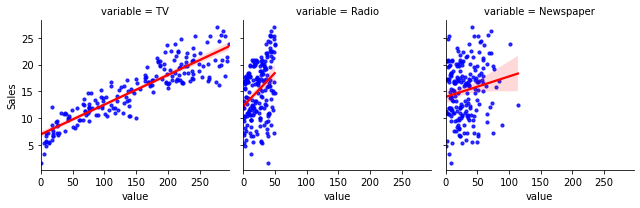

In [5]:
advertising_grid = pd.melt(advertising, id_vars="Sales", value_vars = ["TV", "Radio", "Newspaper"])
g = sns.FacetGrid(advertising_grid, col="variable")
g.map(sns.regplot, "value", "Sales",  
      ci = 95,
      scatter_kws = {"color": "blue", 's': 10}, 
      line_kws = {"color": "red"});

O mirando en detalle:

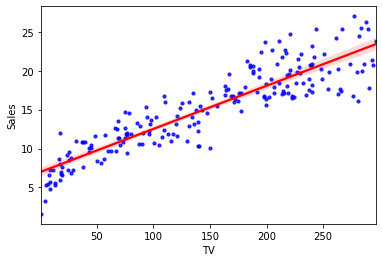

In [6]:
sns.regplot(data = advertising, x = "TV", y = "Sales", 
            ci = 95,
            scatter_kws = {"color": "blue", 's': 10},
            line_kws = {"color": "red"});                        

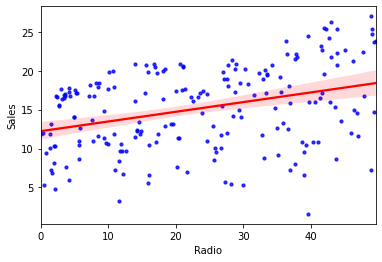

In [7]:
sns.regplot(data = advertising, x = "Radio", y = "Sales", 
            ci = 95,
            scatter_kws = {"color": "blue", 's': 10},
            line_kws = {"color": "red"});                        

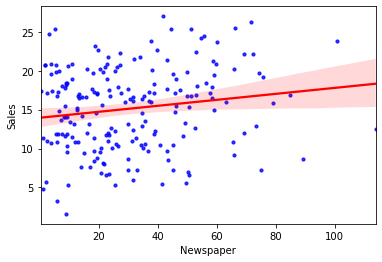

In [8]:
sns.regplot(data = advertising, x = "Newspaper", y = "Sales", 
            ci = 95,
            scatter_kws = {"color": "blue", 's': 10},
            line_kws = {"color": "red"});                        

### Introducción

---

Pensemos en los datos que vimos recién. 

Algunas preguntas que podrían surgir son:

- ¿**Cuáles** de los medios mencionados contribuyen a las ventas?

- ¿**Qué tan fuerte** es esa relación?

- ¿Con qué **precisión** podemos predecir las ventas futuras?

- ¿Es esta **relación lineal**?




<div class="div-dhds-fondo-1"> Regresión Lineal Simple
<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_21_Regresion_Lineal_Simple/Presentacion/img/M3_CLASE_21_separador.png" align="center" />

</div>

### Regresión Lineal Simple

---

La **regresión lineal simple** intenta predecir una respuesta cuantitativa **Y** en base a una única variable predictora **X**. 

Asume que hay aproximadamente una relación lineal entre X e Y. Matemáticamente:

<p style="font-size:25px;">
\begin{equation}
Y = \beta_0 + \beta_1 . X
\end{equation}
</p>
Podemos leer esta expresión como "se modela aproximadamente como".

Por ejemplo, X puede representar el presupuesto en publicidad en **TV** e Y las ventas (**Sales**)

<p style="font-size:25px;">
\begin{equation}
Sales = \beta_0 + \beta_1 . TV
\end{equation}
</p>





$\beta_0$ y $\beta_1$ son dos constantes que representan el **intercepto** y la **pendiente** en el modelo lineal. 

$\beta_0$ y $\beta_1$  son conocidos como los **parámetros del modelo**. 

Una vez que hemos usado nuestro conjunto de entrenamiento para entrenar el modelo podemos **predecir futuras ventas en base a un valor particular** de TV.

Entrenar el modelo equivale a calcular sus parámetros, que para la regresión lineal son los **estimadores** $\hat{\beta_0}$ y $\hat{\beta_1}$ de los coeficientes de la regresión.

<p style="font-size:25px;">
\begin{equation}
\hat{y} = \hat{\beta_0} + \hat{\beta_1} . x
\end{equation}
</p>

donde $\hat{y}$ indica una predicción de Y basada en un valor particular $x$.

Aquí usamos un símbolo $\hat{}$ para denotar el valor estimado para un parámetro o coeficiente desconocido, o para denotar el valor predicho de la respuesta.



### En resumen

---

**Regresión Lineal Simple** consiste en predecir una respuesta cuantitativa Y en base a una única variable predictora X:

<p style="font-size:16px;">
\begin{equation}
Y \approx \beta_0 + \beta_1 . X
\end{equation}
</p>

Ejemplo:

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_21_Regresion_Lineal_Simple/Presentacion/img/M3_CLASE_21_ordenada_pendiente.png" align="center"/>

$\beta_0$ y $\beta_1$ son los coeficientes desconocidos que vamos a estimar, o ajustar en base a los datos de entrenamiento. 

Una vez estimados, los podemos usar para predecir:

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_21_Regresion_Lineal_Simple/Presentacion/img/M3_CLASE_21_predicho.png"  align="center"/>

<div class="div-dhds-fondo-1"> Estimación de los coeficientes
<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_21_Regresion_Lineal_Simple/Presentacion/img/M3_CLASE_21_separador.png" align="center" />

</div>

### Estimación de los coeficientes

---



<div class = "Table" style="font-size:20px;" > 
<div class = "Row">
<div class = "Cell" style="width:70%;line-height:3.5;">
<b>Definiciones</b>
<br/>        
Residuo o error de predicción: $e_i = y_i - \hat{y_i}$
<br/>    
Residual sum of squares: $RSS = \sum_{i=1}^{n} e_i^2 = \sum_{i=1}^{n} (y_i - \hat{\beta_0} - \hat{\beta_1} . x_i)^2$
<br/>    
$\hat{\beta_1} = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n}(x_i - \bar{x})^2}$    
<br/>    
$\hat{\beta_0} = \bar{y} - \hat{\beta_1}\bar{x}$    
<br/>        
$\bar{y} \equiv \frac{1}{n}\sum_{i=1}^{n} y_i$ 
<br/>            
$\bar{x} \equiv \frac{1}{n}\sum_{i=1}^{n} x_i$    
</div>
<div class = "Cell" style="vertical-align: middle;">
    <img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_21_Regresion_Lineal_Simple/Presentacion/img/M3_CLASE_21_residuos.png" align="middle" />
</div>
</div>
</div>

   



### Siguiendo con el ejemplo

---

La figura muestra el ajuste de una regresión lineal simple al dataset Advertising, donde:

$\hat{\beta_0} = 6.975$ y $\hat{\beta_1} = 0.055$


De acuerdo a esta aproximación, un adicional de $1000 gastados en publicidad en TV está asociado con vender aproximadamente 55 unidades adicionales del producto. 

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_21_Regresion_Lineal_Simple/Presentacion/img/M3_CLASE_21_regresion_lineal_simple_ejemplo1.png" align="center" width="70%"/>

¿En qué unidades están expresados los coeficientes del modelo?

<div class="div-dhds-fondo-1"> Evaluación del Modelo
<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_21_Regresion_Lineal_Simple/Presentacion/img/M3_CLASE_21_separador.png" align="center" />

</div>

### Evaluación del Modelo

---

Supongamos que nuestros datos están representados por los puntos azules de este gráfico.

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_21_Regresion_Lineal_Simple/Presentacion/img/M3_CLASE_21_R2_1.png" align="center"/>


Y el modelo más simple que podemos plantear para ajustar estos datos es una constante, es decir intentamos predecir los valores de $Y$ independiente de los valores que tome $X$.

**¿Qué valor debe tomar esa constante para minimizar el error cuadrático?**

La recta de color rojo en este gráfico representa en modelo 





Predecir los valores de $Y$ independiente de los valores que tome $X$ pododemos representarlo de este modo

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_21_Regresion_Lineal_Simple/Presentacion/img/M3_CLASE_21_R2_2.png" align="center"/>

El valor que minimiza el error cuadrático es el valor de la media de los puntos azules, representado por el triángulo rojo. 

**Teniendo la posibilidad de usar los valores de $X$ de los datos, podríamos hacer una mejor aproximación que la media de los puntos? $R^2$ responde esta pregunta.**


#### $R²$

---


$TSS$ (Total Sum of Squares): Variabilidad total de los datos

$TSS = \sum_{i = 1}^{n}(y_i - \bar{y})^2$

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_21_Regresion_Lineal_Simple/Presentacion/img/M3_CLASE_21_R2_3.png" align="center"/>

Ahora queremos calcular el error en los valores de la regresión respecto de los verdaderos valores. Este es el error de la regresión. Idealmente el error de la regresión es muy bajo, cercano a cero.

$RSS$ (Residual Sum of Squares): Variabilidad no explicada por el modelo

$RSS = \sum_{i = 1}^{n}(y_i - \hat{y_i})^2$

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_21_Regresion_Lineal_Simple/Presentacion/img/M3_CLASE_21_R2_4.png" align="center"/>


El cociente entre el error de la regresión y el error total (respecto de la media) $\frac{RSS}{TSS}$ nos dice qué proporción del error total **se mantiene** en el modelo de regresión.

Restando este cociente de 1, se obtiene la proporción de error que **es eliminada** usando una regresión.

$R^2$: Proporción de la variabilidad explicada por el modelo

$$R^2 = \frac{TSS - RSS}{TSS}$$

$R^2 \to 0$ cuando el modelo explica poco de la variabilidad de los datos, o la proporción de error que es eliminada usando una regresión es muy baja

$R^2 \to 1$ cuando el modelo explica mucho de la variabilidad de los datos, o la proporción de error que es eliminada usando una regresión es muy alta


#### Ejemplo

Volvamos a los datos de `advertising`, sabiendo que los coeficientes de la regresión lineal donde $X$ es $TV$ e $Y$ es $Sales$ son 

$\hat{\beta_0} = 6.975$ y $\hat{\beta_1} = 0.055$


Calculemos el valor de $R^2$


In [9]:
beta_0 = 6.975
beta_1 = 0.055

mean_y = advertising.Sales.mean()
mean_y

tss_i = advertising.Sales.apply(lambda yi: (yi - mean_y) ** 2)
tss = tss_i.sum()
tss

y_hat_i = beta_0 + beta_1 * advertising.TV
y_hat_i

i_count = advertising.shape[0]
rss_i = [(advertising.Sales[i] - y_hat_i[i]) ** 2 for i in range(i_count)]
    
rss = sum(rss_i)
rss

r2 = (tss - rss) / tss
print("R2: ", np.round(r2, 3))


R2:  0.812


#### Entonces

---

* Un estadístico $R^2$ cercano a 1 indica que una gran proporción de la variabilidad en la respuesta ha sido explicada por la regresión. 

* Un valor de $R^2$ cercano a 0 indica que la regresión no explicó gran parte de la variabilidad en la respuesta; esto podría ocurrir porque el modelo lineal está mal, o porque el error inherente $\sigma^2$ es alto, o ambas. 


Por ejemplo, en la regresión del ejemplo anterior, el $R^2$ fue 0.812, y por lo tanto más del 80% de la variabilidad en sales está explicada por una regresión lineal sobre TV. 


#### ¿$R²$ negativo?

---

Para fines prácticos, el mínimo $R^2$ que vamos a obtener es cero, pero sólo porque asumimos que si la regresión no mejora la estimación de la media, vamos a estimar con la media. 

Sin embargo, si la regresión es peor que usar la media, el valor de $R^2$ calculado es negativo.

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_21_Regresion_Lineal_Simple/Presentacion/img/M3_CLASE_21_R2_5.png" align="center" width="60%"/>


#### ¿$R²$ indefinido?

---

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_21_Regresion_Lineal_Simple/Presentacion/img/M3_CLASE_21_R2_6.png" align="center"/>

$TSS = 0$

$RSS = 0$

$R^2 = \frac{0 - 0}{0} = indefinido$



#### $R²$ en resumen

---

* Un valor de $R^2$ de 1.0 es lo mejor que podemos conseguir. Indica que no hay ningún error en la regresión.

* Un valor de $R^2$ de 0 significa que la regresión no es mejor que tomar el valor medio, es decir no estamos usando ninguna información de otras variables.

* Un valor negativo de $R^2$, significa que estamos estimando peor que usando la media.  


<div class="div-dhds-fondo-1"> Precisión de los coeficientes estimados
<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_21_Regresion_Lineal_Simple/Presentacion/img/M3_CLASE_21_separador.png" align="center" />

</div>

### Función de Regresión Poblacional y Muestral

---

**"Essentially, all models are wrong, but some are useful", George Box**

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_21_Regresion_Lineal_Simple/Presentacion/img/M3_CLASE_21_regresion_poblacional_muestral.png" align="center" />



En el gráfico anterior se muestran datos generados a partir de una función conocida y ruido aleatorio con media cero. 

* En el gráfico de la Izquierda

    - La línea roja representa la <a style="color:red;">verdadera relación</a> $f(x)=2+3X$, que es llamada la **"función de regresión poblacional"**. 

    - La línea azul representa la función de <a style="color:blue;">estimación por mínimos cuadrados</a> de $f(x)$ estimada en base a los datos.

* En el gráfico de la Derecha

    - La función de <a style="color:red;">regresión poblacional</a> está en rojo y la de <a style="color:blue;">mínimos cuadrados</a> en azul oscuro. 
    
    - En azul claro, hay 10 funciones de mínimos cuadrados basadas en <a style="color:#6495ED;">submuestras independientes y aleatorias de los datos</a>. Cada línea de mínimos cuadrados es diferente pero en promedio, las líneas están cerca de la función de regresión poblacional.



### Error estandar de los coeficientes

---
Recordemos que 

<p style="font-size:20px;">
$$Y = \hat{\beta_0} + \hat{\beta_1}. X + \epsilon$$
</p>

y queremos calcular 

<p style="font-size:20px;">
$Var(\hat{\beta_0})$ 
</p>    
<p style="font-size:20px;">
$Var(\hat{\beta_1})$
</p>
    
Resulta

<p style="font-size:20px;">
$Var(\hat{\beta_0}) = \frac{\sigma^2 . \sum{x_i^2}}{n. \sum{x_i^2} - (\sum{x_i})^2}$
</p>

<p style="font-size:20px;">
$Var(\hat{\beta_1}) = \frac{n. \sigma^2}{n. \sum{x_i^2} - (\sum{x_i})^2}$
</p>

**Sabemos que $\sigma^2$ es la varianza del error $\epsilon$ y es desconocido.**


Estimamos el valor de $\sigma^2$, que es la varianza del error $\epsilon$ 

<p style="font-size:20px;">
$\hat{\sigma^2} = \frac{RSS}{n-2}$
</p>    

Entonces quedan


<p style="font-size:20px;">
$\hat{Var(\hat{\beta_0})} = \frac{\hat{\sigma^2} . \sum{x_i^2}}{n. \sum{x_i^2} - (\sum{x_i})^2}$
</p>

<p style="font-size:20px;">
$\hat{Var(\hat{\beta_1})} = \frac{n. \hat{\sigma^2}}{n. \sum{x_i^2} - (\sum{x_i})^2}$
</p>

Tomando la raiz cuadrada obtenemos los errores estandar de los coeficientes de la estimación.


Entonces el error estandar de los coeficientes se calculan como

<p style="font-size:20px;">
$SE(\hat{\beta_0}) = \sqrt{\frac{\hat{\sigma^2} . \sum{x_i^2}}{n. \sum{x_i^2} - (\sum{x_i})^2}}$
</p>

<p style="font-size:20px;">
$SE(\hat{\beta_1}) = \sqrt{\frac{n. \hat{\sigma^2}}{n. \sum{x_i^2} - (\sum{x_i})^2}}$
</p>

... (cuentas)

<p style="font-size:20px;">
$$SE(\hat{\beta_1}) = \sqrt{\frac{\hat{\sigma^2}}{\sum_{i=1}^{n}{(x_i - \bar{x})^2}}}$$
</p>

<p style="font-size:20px;">
$$\hat{\sigma^2} = \frac{RSS}{n-2}$$
</p>    



### Intervalo de confianza para $\beta_1$

---

Expresión para un intervalo de confianza de aproximadamente 95% para $\beta_1$ :

<p style="font-size:20px;">
$$IC = [\hat{\beta_1} - 2. SE(\hat{\beta_1}), \hat{\beta_1} + 2. SE(\hat{\beta_1})] $$
</p>

### Test de hipótesis sobre los coeficientes estimados

---

**¿Existe  evidencias para afirmar que hay relación entre X e Y?**

<p style="font-size:16px;">
$$Y = \beta_0 + \beta_1. X + \epsilon$$
</p>

El test de significación individual tiene las siguientes hipótesis 

Hipótesis nula: No hay relación entre X e Y; entonces

$H_0: \beta_1 = 0$

Hipótesis alternativa: Hay alguna relación entre X e Y; entonces

$H_1: \beta_1 \ne 0$






Si $\beta_1 = 0$, entonces el modelo se reduce a $Y = \beta_0 + \epsilon$

Por lo tanto $X$ no estaría asociado a $Y$

Necesitamos determinar si nuestro estimador para $\beta_1$ está lo suficientemente lejos de cero, de forma que podamos estar seguros de que $\beta_1$ no es cero. 

¿Cuánto creen que es "suficientemente lejos de cero"?

Esto depende de la precisión de $\hat{\beta_1}$, es decir **depende del error estándar de nuestro estimador del coeficiente**, que a su vez depende entre otras cosas del tamaño muestral n.  

En la práctica, se computa el **estadístico t** que mide la cantidad de desvios estándar a las que el estimador se encuentra del cero. 

$$t = \frac{\hat{\beta_1} - 0}{SE(\hat{\beta_1})}$$

con **n-2 grados de libertad**. 

En general, cuando tengamos más variables, los grados de libertad van a ser $n - p - 1$, es decir la cantidad de observaciones menos la cantidad de parámetros que estamos estimando.

Calculamos la probabilidad de observar cualquier valor igual a |t| o mayor asumiendo que $\beta_1 = 0$, por lo que bajo $H_0$ el estadístico de prueba es una variable con distribución T-Student con n-p-1 grados de libertad.  

Recordemos que llamamos a esta probabilidad p-value. 

**Un p-value pequeño indica que es poco probable observar un valor del estadístico como el observado o más extremo asumiendo que $H_0$ es verdadera.** 

Por lo tanto, si el p-value es chico podemos rechazar $H_0$ con baja probabilidad de equivocarnos.


### En resumen

---

Al ajustar una regresión lineal, es común reportar el error estándar de cada estimador: $SE(\hat{\beta_0})$ y $SE(\hat{\beta_1})$

Esto es útil para 

* Construir intervalos de confianza de los estimadores de los coeficientes.

* Evaluar la significatividad de cada estimador, mediante un test estadístico.

    - p-valor bajo (típicamente, $p<0.05$ ó $p<0.01$): es improbable observar al azar una asociación semejante entre $X$ e $Y$.
    
    - p-valor alto: es probable que la asociación observada sea sólo consecuencia del azar.


### Ejemplo

Siguiendo el ejemplo de `advertising` vamos a calcular los intervalos de confianza para $\beta_0$ y $\beta_1$

Para eso vamos a usar la bilioteca  <a href="https://www.statsmodels.org/stable/index.html" target="_blank">statsmodels</a> que provee estadísticas sobre el ajuste.



In [10]:
import statsmodels.api as sm

X_t = np.array(advertising.TV, ndmin=2)
X = np.transpose(X_t)
y = advertising.Sales

# Tenemos que agregar explícitamente a una constante:
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print (model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     856.2
Date:                Sat, 10 Apr 2021   Prob (F-statistic):           7.93e-74
Time:                        18:30:59   Log-Likelihood:                -448.99
No. Observations:                 200   AIC:                             902.0
Df Residuals:                     198   BIC:                             908.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9748      0.323     21.624      0.0

La información que nos brinda el método `summary()` incluye:

* El nombre de la variable dependiente (y) `Dep. Variable` que en este caso es `Sales`

* Los grados de libertad (n-2) `Df Residuals` que en este caso es $198$

* El valor de $R^2$ `R-squared`  que en este caso es $0.812$

* Los valores de los coeficientes 

    - $\hat{\beta_0}$ `const`, para este ejemplo $6.9748$
    
    - $\hat{\beta_1}$ `x1`, para este ejemplo $0.0555$
    
* Los valores de los estadísticos t y su p-value que nos permiten determinar la significancia estadística de cada coeficiente calculado. En este ejemplo tanto el intercepto como la pendiente tienen p-value 0, por lo tanto son significativos (equivale a decir que rechazan las hipótesis nulas $H_0: \hat{\beta_0} = 0$ y $H_0: \hat{\beta_1} = 0$)

* El intervalor de confianza para $\hat{\beta_0}$ y $\hat{\beta_1}$. en este caso $IC_{\beta_0, 0.95} = [ 6.339, 7.611]$ y $IC_{\beta_1, 0.95} = [ 0.052, 0.059]$

<div class="div-dhds-fondo-1"> Supuestos de Gauss-Markov
<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_21_Regresion_Lineal_Simple/Presentacion/img/M3_CLASE_21_separador.png" align="center" />

</div>

###  Supuestos de Gauss-Markov

---

Antes de utilizar el análisis de regresión y considerar medidas de incerteza o dispersión, es necesario conocer los supuestos en los que se basa el método. Veremos primero cuáles son esos supuestos y luego qué procedimientos pueden utilizarse para validarlos.

1\. El modelo es lineal en los parámetros. $$Y = \beta_0 + \beta_1 . X_1 + \beta_2 . X_2 + \beta_p . X_p + \epsilon$$

2\. Los estimadores de los parámetros poblacionales se estiman a partir de una muestra aleatoria.

3\. No hay colinealidad perfecta entre las variables explicativas.

4\. El valor esperado del error es 0 para cualquier valor de la variable explicativa.
    

5\. Homocedasticidad

Para cualquier valor de la variable explicativa, el error tienen la misma varianza

6\. Normalidad de los errores.

Para cada valor $x$, de la variable predictora $X$, la variable respuesta $Y$ debe tener distribución Normal $\epsilon \sim N (0,\sigma_\epsilon)$

7\. Independencia de los errores

Cuando dos variables son independientes su correlación es cero, en general la recíproca no es cierta pero bajo el supuesto de normalidad el supuesto de independencia de los errores se reduce a que no estén correlacionados ($corr(\varepsilon_i, \varepsilon_j ) = 0$ $\forall i \ne j$ ). 


##### Normalidad, Linealidad, Homocedasticidad

$E(y|x) = \beta_0 + \beta_1 . x$

$Var(y|x) = \sigma^2$

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_21_Regresion_Lineal_Simple/Presentacion/img/M3_CLASE_21_normalidad_linealidad_homocedasticidad.png" align="center" />




<div class="div-dhds-fondo-1"> Análisis de Residuos
<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_21_Regresion_Lineal_Simple/Presentacion/img/M3_CLASE_21_separador.png" align="center" />

</div>

#### Validación de los supuestos de Gauss-Markov

---

La validación de los supuestos se realiza en base a los datos y a los residuos de los mismos respecto de la recta ajustada. 

El diagrama de dispersión de los datos permite obtener una impresión sobre el supuesto de linealidad y homocedasticidad. 

El análisis posterior de residuos permitirá confirmar la impresión inicial y validar los supuestos de normalidad e independencia.

Veamos algunas estructuras que suelen verse en los diagramas de dispersión de los residuos


Si graficamos los residuos contra cada una de las variables predictoras los puntos deberían estar distribuidos en forma de nube alrededor del valor 0 del residuo y no formar clusters, para considera válido el supuesto de independencia de los errores. En este ejemplo en particular observamos algunos clusters.

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_21_Regresion_Lineal_Simple/Presentacion/img/M3_CLASE_21_homocedasticidad.png" align="center" />



En esta figura no se satisface el supuesto de homocedasticidad, ya que los residuos tienen variabilidad creciente a medida que crece el valor de los predichos

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_21_Regresion_Lineal_Simple/Presentacion/img/M3_CLASE_21_no_homocedasticidad.png" align="center" />



Usamos un scatterplot para verificar si se cumple o no el supuesto de linealidad.

<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_21_Regresion_Lineal_Simple/Presentacion/img/M3_CLASE_21_linealidad.png" align="center" />




Cuando se satisfacen los supuestos de 

* normalidad de los errores.

* linealidad

* homocedasticidad 

* independencia de los errores 

los errores no están correlacionados y tienen una distribución normal con media 0 y varianza constante. 

### Ejemplo

---

Siguiendo el ejemplo de `advertising` vamos a testear los supuestos de Gauss Markov sobre los datos.





1\. El modelo es lineal en los parámetros. $$Y = \beta_0 + \beta_1 . X_1 + \beta_2 . X_2 + \beta_p . X_p + \epsilon$$
    

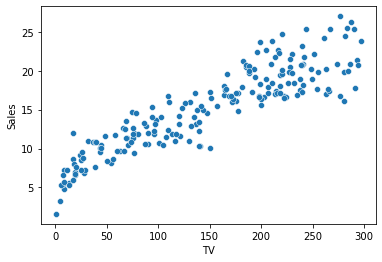

In [11]:
sns.scatterplot(data = advertising, x = "TV", y = "Sales");

2\. Los estimadores de los parámetros poblacionales se estiman a partir de una muestra aleatoria.

Consideramos que las observaciones que conforman el dataset provienen de una muestra aleatoria de la población.

3\. No hay colinealidad perfecta entre las variables explicativas.

La regresión lineal simple tiene sólo una variable explicativa, por lo tanto no hay posibilidad de colinealidad con ninguna otra.


4\. El valor esperado del error es 0 para cualquier valor de la variable explicativa.


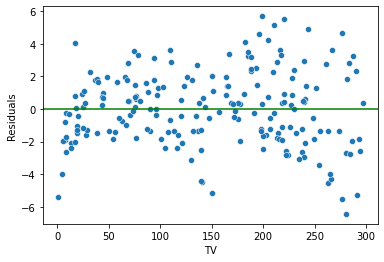

In [12]:
X_t = np.array(advertising.TV, ndmin=2)
X = np.transpose(X_t)
y = advertising.Sales

# Tenemos que agregar explícitamente a una constante:
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
residuals = model.resid

p = sns.scatterplot(data = advertising, x = "TV", y = residuals);
p.axhline(0, color = "green")
p.set(ylabel = "Residuals");

# otra opción:
#sns.residplot(data = advertising, x = "TV", y = "Sales");

5\. Homocedasticidad

Para cualquier valor de la variable explicativa, el error tienen la misma varianza




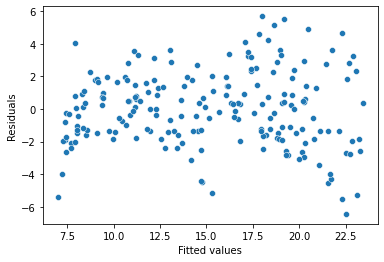

In [13]:
y_hat = model.predict(X)
p = sns.scatterplot(x = y_hat, y = residuals)
p.set(xlabel = "Fitted values",
      ylabel = "Residuals");


6\. Normalidad de los errores.

Para cada valor $x$, de la variable predictora $X$, la variable respuesta $Y$ debe tener distribución Normal $\epsilon \sim N (0,\sigma_\epsilon)$

Usando el método `ProbPlot` vamos a graficar un QQplot para testear la normalidad de los residuos 
<a href="https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.ProbPlot.html" target="_blank">ProbPlot</a>

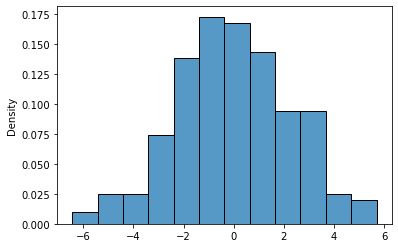

In [14]:
sns.histplot(residuals, kde = False, stat = 'density', line_kws={'linewidth':5});

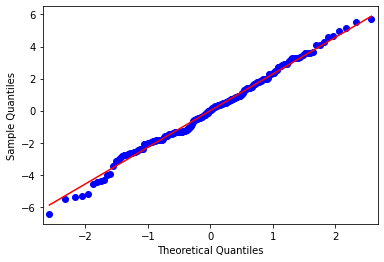

In [15]:
sm.ProbPlot(model.resid).qqplot(line='s');

7\. Independencia de los errores

Cuando dos variables son independientes su correlación es cero, en general la recíproca no es cierta pero bajo el supuesto de normalidad el supuesto de independencia de los errores se reduce a que no estén correlacionados ($corr(\varepsilon_i, \varepsilon_j ) = 0$ $\forall i \ne j$ ). 

<div class="div-dhds-fondo-1"> Conclusiones 
<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_21_Regresion_Lineal_Simple/Presentacion/img/M3_CLASE_21_separador.png" align="center" />

</div>

### Conclusiones

---

El modelo de regresión lineal:

* Nos permite relacionar linealmente una variable explicativa con un variable objetivo de tipo cualitativa.

* Podemos determinar la significancia estadística de cada coeficiente encontrado. 

* El valor de $R^2$ es una medida de la variabilidad explicada por el modelo.

* Una vez estimado nuestro modelo verificamos si se cumplen o no los supuestos de Gauss Markov, ya que si se cumplen podemos decir que nuestro estimador $\beta_1$ es el mejor estimador lineal insesgado


<div class="div-dhds-fondo-1"> Hands-on
<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_21_Regresion_Lineal_Simple/Presentacion/img/M3_CLASE_21_separador.png" align="center" />

</div>

### Ejercicio

----

Usando el dataset `advertising` calculemos los intervalos de confianza para $\beta_0$ y $\beta_1$ de la regresión lineal simple que relaciona `Sales` con `Newspapers` usando su definición, y comparemos este resultado con los valores devueltos por <a href="https://www.statsmodels.org/stable/index.html" target="_blank">statsmodels</a> 

¿Qué pueden decir del nivel de significancia de $\beta_1$?

<p style="font-size:20px;">
$\hat{\beta_1} = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n}(x_i - \bar{x})^2}$    
</p>

<p style="font-size:20px;">
$\hat{\beta_0} = \bar{y} - \hat{\beta_1}\bar{x}$    
</p>

<p style="font-size:20px;">
$\bar{y} \equiv \frac{1}{n}\sum_{i=1}^{n} y_i$ 
</p>

<p style="font-size:20px;">
$\bar{x} \equiv \frac{1}{n}\sum_{i=1}^{n} x_i$    
</p>



<p style="font-size:20px;">
$IC = [\hat{\beta_i} - 2. SE(\hat{\beta_i}), \hat{\beta_1} + 2. SE(\hat{\beta_i})] $
</p>

<p style="font-size:20px;">
$SE(\hat{\beta_0}) = \sqrt{\frac{\hat{\sigma^2} . \sum{x_i^2}}{n. \sum{x_i^2} - (\sum{x_i})^2}}$
</p>

<p style="font-size:20px;">
$SE(\hat{\beta_1}) = \sqrt{\frac{\hat{\sigma^2}}{\sum_{i=1}^{n}{(x_i - \bar{x})^2}}}$
</p>

<p style="font-size:20px;">
$\hat{\sigma^2} = \frac{RSS}{n-2}$
</p>    

<p style="font-size:20px;">
$RSS = \sum_{i=1}^{n} e_i^2 = \sum_{i=1}^{n} (y_i - \hat{\beta_0} - \hat{\beta_1} . x_i)^2$
</p>    


### Solución

---

$\beta_1$

In [16]:
x_is = advertising.Newspaper
y_is =  advertising.Sales

x_bar = np.mean(x_is)

y_bar = np.mean(y_is)
x_is_minus_x_bar = x_is - x_bar

y_is_minus_y_bar = y_is - x_bar
y_is_minus_y_bar

denom_1 = x_is_minus_x_bar ** 2
denom = np.sum(denom_1)

num_1 = x_is_minus_x_bar * y_is_minus_y_bar
num = np.sum(num_1)

beta_1_hat = num / denom
beta_1_hat

0.03832399510524258

$\beta_0$

In [17]:
beta_0_hat = y_bar - beta_1_hat *  x_bar
beta_0_hat

13.95954865355442

$RSS$

In [18]:
y_is_hat = beta_0_hat + beta_1_hat * x_is
rss = np.sum((y_is - y_is_hat) ** 2)
rss

5417.354539511408

$SE(\hat{\beta_1})$

In [19]:
n = advertising.shape[0]
sigma_sq_hat = rss / (n - 2)

In [20]:
se_beta_1_hat = np.sqrt(sigma_sq_hat / denom)
se_beta_1_hat

0.017025666500722073

$CI(\beta_1)$

In [21]:
min_ci = beta_1_hat - 2 * se_beta_1_hat
max_ci = beta_1_hat + 2 * se_beta_1_hat

round(min_ci, 3), round(max_ci, 3)

(0.004, 0.072)

$SE(\hat{\beta_0})$

In [22]:
num = sigma_sq_hat * np.sum(x_is ** 2)

denom = n * np.sum(x_is ** 2) - np.sum(x_is)**2

se_beta_0_hat = np.sqrt(num / denom)

se_beta_0_hat

0.6382885131624153

$CI(\beta_0)$

In [23]:
min_ci = beta_0_hat - 2 * se_beta_0_hat
max_ci = beta_0_hat + 2 * se_beta_0_hat

round(min_ci, 3), round(max_ci, 3)

(12.683, 15.236)

Usando statsmodels obtenemos

In [24]:
X_t = np.array(advertising.Newspaper, ndmin=2)
X = np.transpose(X_t)
y = advertising.Sales

# Tenemos que agregar explícitamente a una constante:
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     5.067
Date:                Sat, 10 Apr 2021   Prob (F-statistic):             0.0255
Time:                        18:30:59   Log-Likelihood:                -613.69
No. Observations:                 200   AIC:                             1231.
Df Residuals:                     198   BIC:                             1238.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.9595      0.638     21.870      0.0

$\beta_1$ : x1 = $0.0383$

$\beta_0$ : const = $13.9595$

$CI(\beta_1)$:  [$0.005$, $0.072$]

$CI(\beta_0)$:  [$12.701$, $15.218$]       

El p-value de $\beta_1$ es 0.025. 

Si definimos el nivel del test en 0.05 entonces con este valor de p-value rechazamos $H_0$.

Si definimos el nivel del test en 0.01 entonces no podemos rechazar $H_0$ y esto implica que no podemos afirmar $\beta_1$ sea distinto de cero.



<div class="div-dhds-fondo-1"> Referencias y Material Adicional
<img src="https://raw.githubusercontent.com/Digital-House-DATA/ds_blend_2021_img/master/M3/CLASE_21_Regresion_Lineal_Simple/Presentacion/img/M3_CLASE_21_separador.png" align="center" />

</div>

### Referencias y Material Adicional

---

<a href="https://www.statlearning.com/" target="_blank">An Introduction to Statistical Learning</a>

<a href="https://www.kaggle.com/ashydv/advertising-dataset" target="_blank">advertising dataset</a>

<a href="http://www.fairlynerdy.com/what-is-r-squared/" target="_blank">What Is R Squared And Negative R Squared?</a>

<a href="https://www.kdnuggets.com/2019/07/check-quality-regression-model-python.html" target="_blank">How do you check the quality of your regression model in Python?</a>

<a href="https://www.econometrics-with-r.org/4-lrwor.html" target="_blank">Linear Regression with One Regressor</a>

<a href="https://www.youtube.com/playlist?list=PL03F4F3BE94EB5CE9" target="_blank">Modelo Lineal</a>

<a href="https://www.youtube.com/watch?v=ReXRUDYUyeo" target="_blank">Errores estándar de los coeficientes</a>
